# 1. Importing the libraries.

In [1]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the arff module
from scipy.io import arff

# 2. Importing and Organizing the data.

In [3]:
#loading the dataset
dataset_1 = arff.loadarff('./data/1year.arff')
dataset_2 = arff.loadarff('./data/2year.arff')
dataset_3 = arff.loadarff('./data/3year.arff')
dataset_4 = arff.loadarff('./data/4year.arff')
dataset_5 = arff.loadarff('./data/5year.arff')

In [4]:
#coverting the data into a dataframe
#Training dataset
df1 = pd.DataFrame(dataset_1[0])
df2 = pd.DataFrame(dataset_2[0])
df3 = pd.DataFrame(dataset_3[0])
df5 = pd.DataFrame(dataset_5[0])

Tr_df = pd.concat([df1,df2,df3,df5],axis = 0)

In [5]:
#Testing dataset
Ts_df = pd.DataFrame(dataset_4[0])

In [6]:
#to convert the features to float
Tr_df.astype(float)
Ts_df.astype(float)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.159290,0.46240,0.077730,1.16830,-44.8530,0.467020,0.189480,0.82895,1.12230,0.38330,...,0.108990,0.415570,0.89101,0.001422,7.7928,4.9914,119.810,3.0465,3.05600,0.0
1,-0.127430,0.46243,0.269170,1.75170,7.5970,0.000925,-0.127430,1.16250,1.29440,0.53757,...,-0.089372,-0.237040,1.06250,0.150410,5.4327,3.4629,100.970,3.6150,3.47250,0.0
2,0.070488,0.23570,0.527810,3.23930,125.6800,0.163670,0.086895,2.87180,1.05740,0.67689,...,0.054286,0.104130,0.94571,0.000000,7.1070,3.3808,76.076,4.7978,4.78180,0.0
3,0.136760,0.40538,0.315430,1.87050,19.1150,0.504970,0.136760,1.45390,1.11440,0.58938,...,0.102630,0.232030,0.89737,0.073024,6.1384,4.2241,88.299,4.1337,4.64840,0.0
4,-0.110080,0.69793,0.188780,1.27130,-15.3440,0.000000,-0.110080,0.43282,1.73500,0.30207,...,0.439880,-0.364400,0.57153,0.000000,18.8010,2.7925,146.390,2.4934,15.03600,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9787,0.004676,0.54949,0.192810,1.38990,-39.0640,0.004676,0.013002,0.78627,0.97093,0.43205,...,-0.029937,0.010823,1.02990,0.127190,3.8159,3.3892,146.860,2.4854,3.93150,1.0
9788,-0.027610,0.60748,-0.029762,0.90591,-20.9230,-0.027610,-0.027610,0.55161,1.00730,0.33509,...,0.007198,-0.082395,0.99280,0.868910,23.0280,27.1360,37.047,9.8523,4.36810,1.0
9789,-0.238290,0.62708,0.090374,1.61250,-1.0692,-0.238290,-0.240360,0.28322,0.80307,0.17760,...,-0.245220,-1.341700,1.24520,2.700100,6.5694,4.1781,88.883,4.1065,0.79501,1.0
9790,0.097188,0.75300,-0.327680,0.43850,-214.2400,-0.331300,0.104280,0.32803,0.98145,0.24700,...,0.288240,0.393470,0.68127,0.508850,4.3246,35.5030,217.030,1.6818,1.31910,1.0


In [7]:
#converting class labels to int
Tr_df['class'].replace(b'0',0,inplace=True)
Tr_df['class'].replace(b'1',1,inplace=True)

Ts_df['class'].replace(b'0',0,inplace=True)
Ts_df['class'].replace(b'1',1,inplace=True)

In [8]:
#checking the datatype of the class
Tr_df['class'].dtype
Ts_df['class'].dtype

dtype('int64')

# 3. Data analysis and Data preprocessing.

## i. Missing data analysis

In [9]:
#Checking missing values according to the features
Tr_df.isna().sum()
Ts_df.isna().sum()

Attr1       1
Attr2       1
Attr3       1
Attr4      43
Attr5      21
         ... 
Attr61     32
Attr62     21
Attr63     43
Attr64    231
class       0
Length: 65, dtype: int64

Note: From the above output, it shows that each attribute or feature consist of some missing values.

<AxesSubplot:>

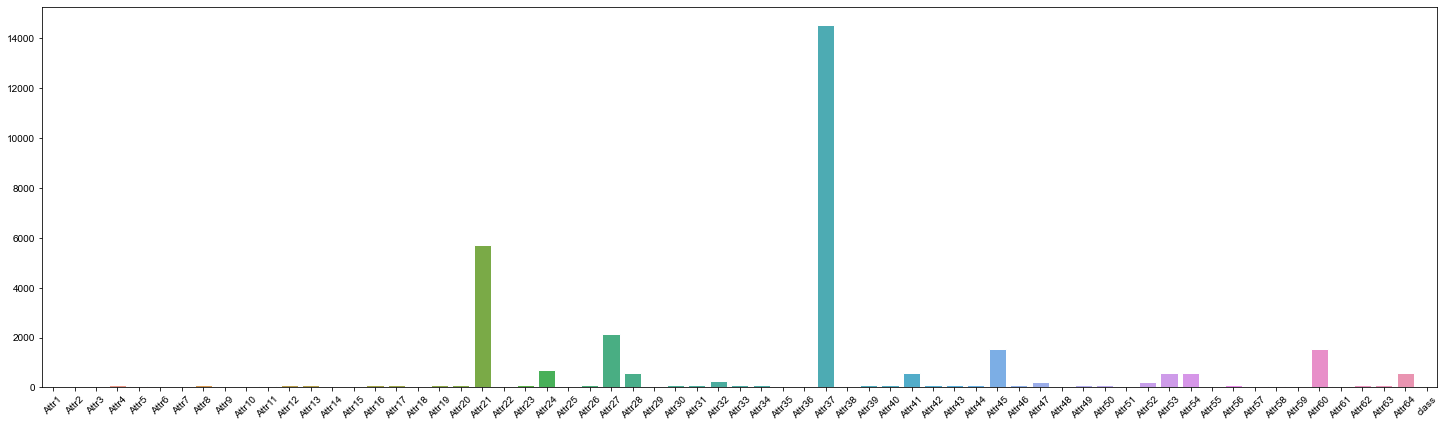

In [10]:
#The barplot shows that the Attr21 and Attr37 have more missing values
plt.figure(figsize=(25,7))
plt.xticks(rotation=45)
sns.set_theme(style='ticks')
sns.barplot(x = Tr_df.columns, y = Tr_df.isna().sum().values)

<AxesSubplot:>

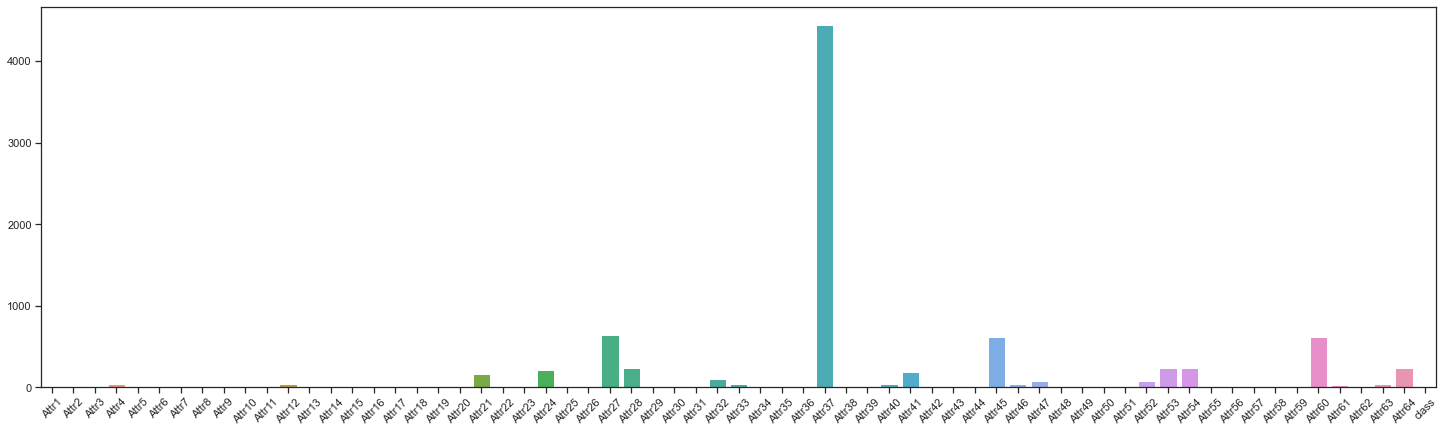

In [11]:
plt.figure(figsize=(25,7))
plt.xticks(rotation=45)
sns.set_theme(style='ticks')
sns.barplot(x = Ts_df.columns, y = Ts_df.isna().sum().values)

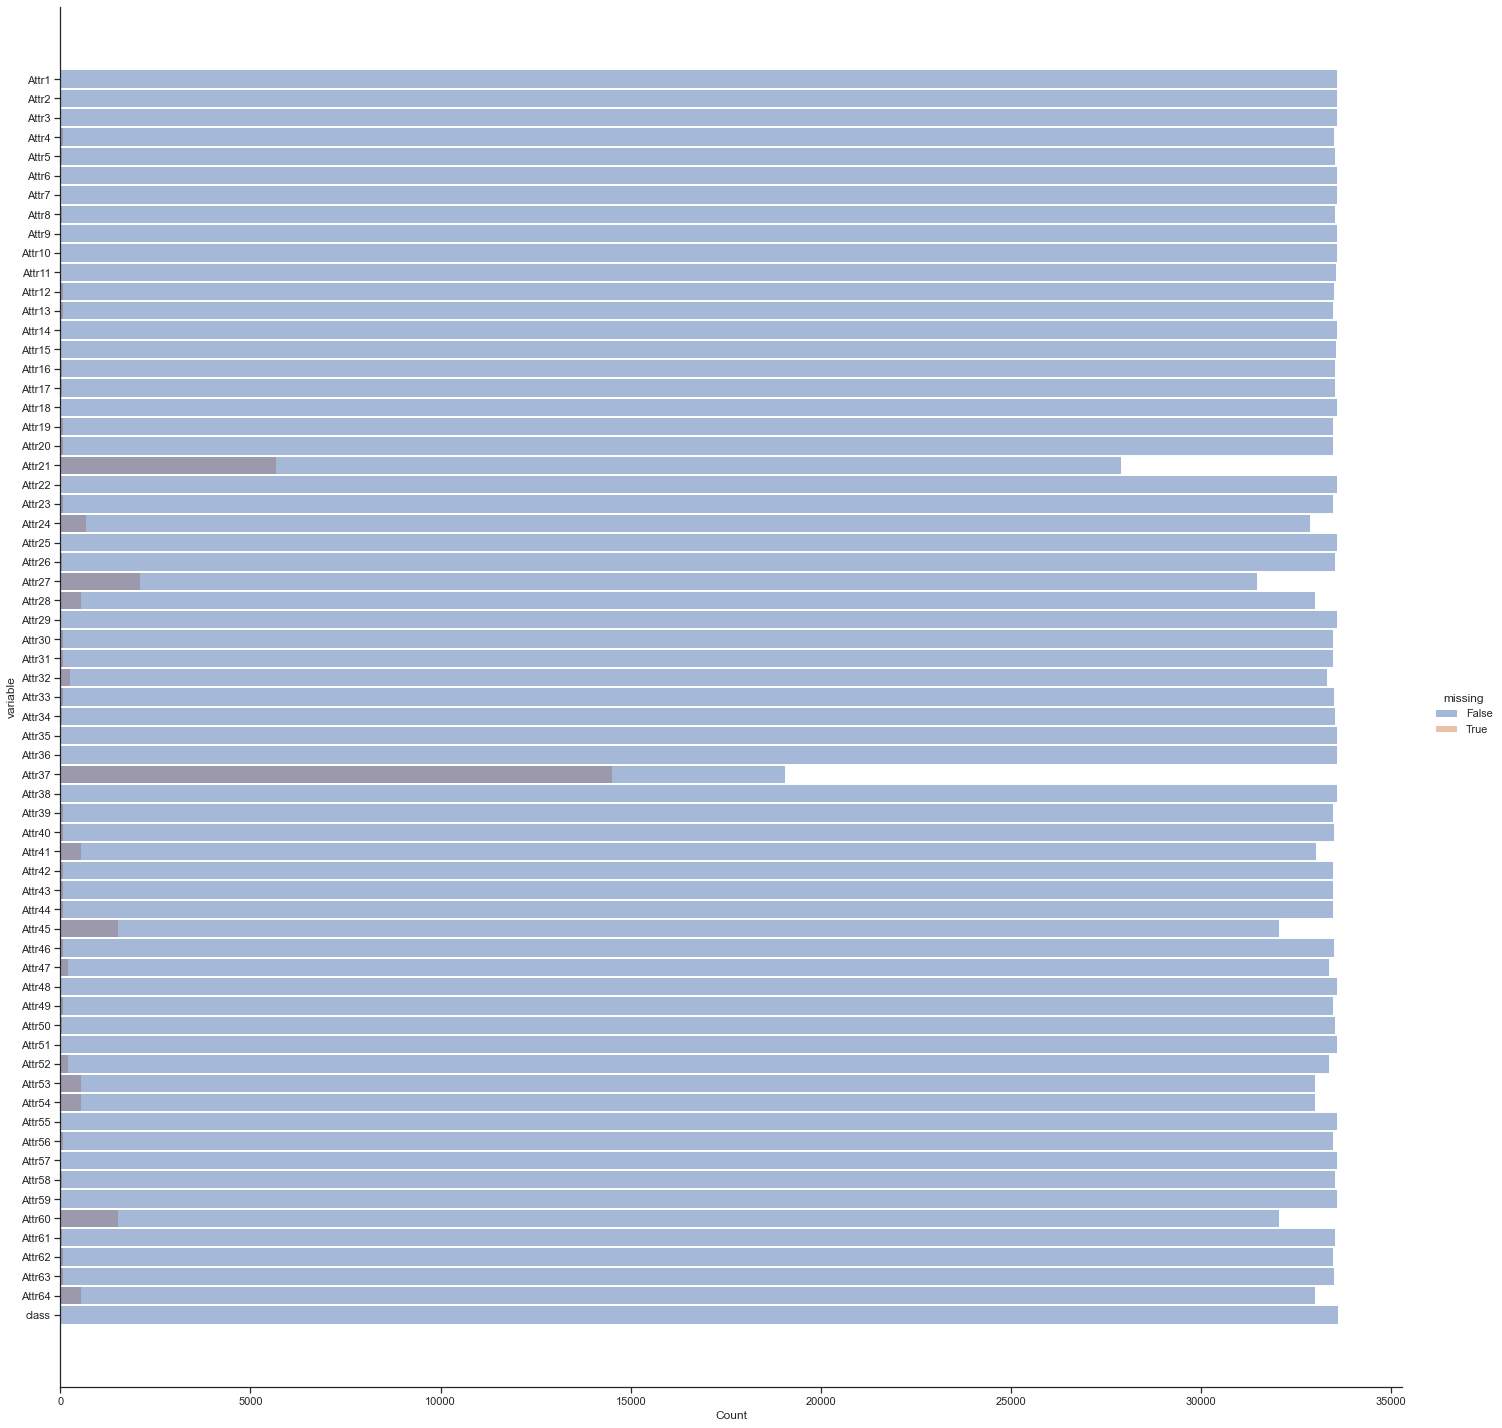

In [13]:
#Plotting the missing values with the displot showing the missing values as true and non missing as false
sns.displot(data=Tr_df.isna().melt(value_name='missing'),y='variable',hue='missing',height=20)

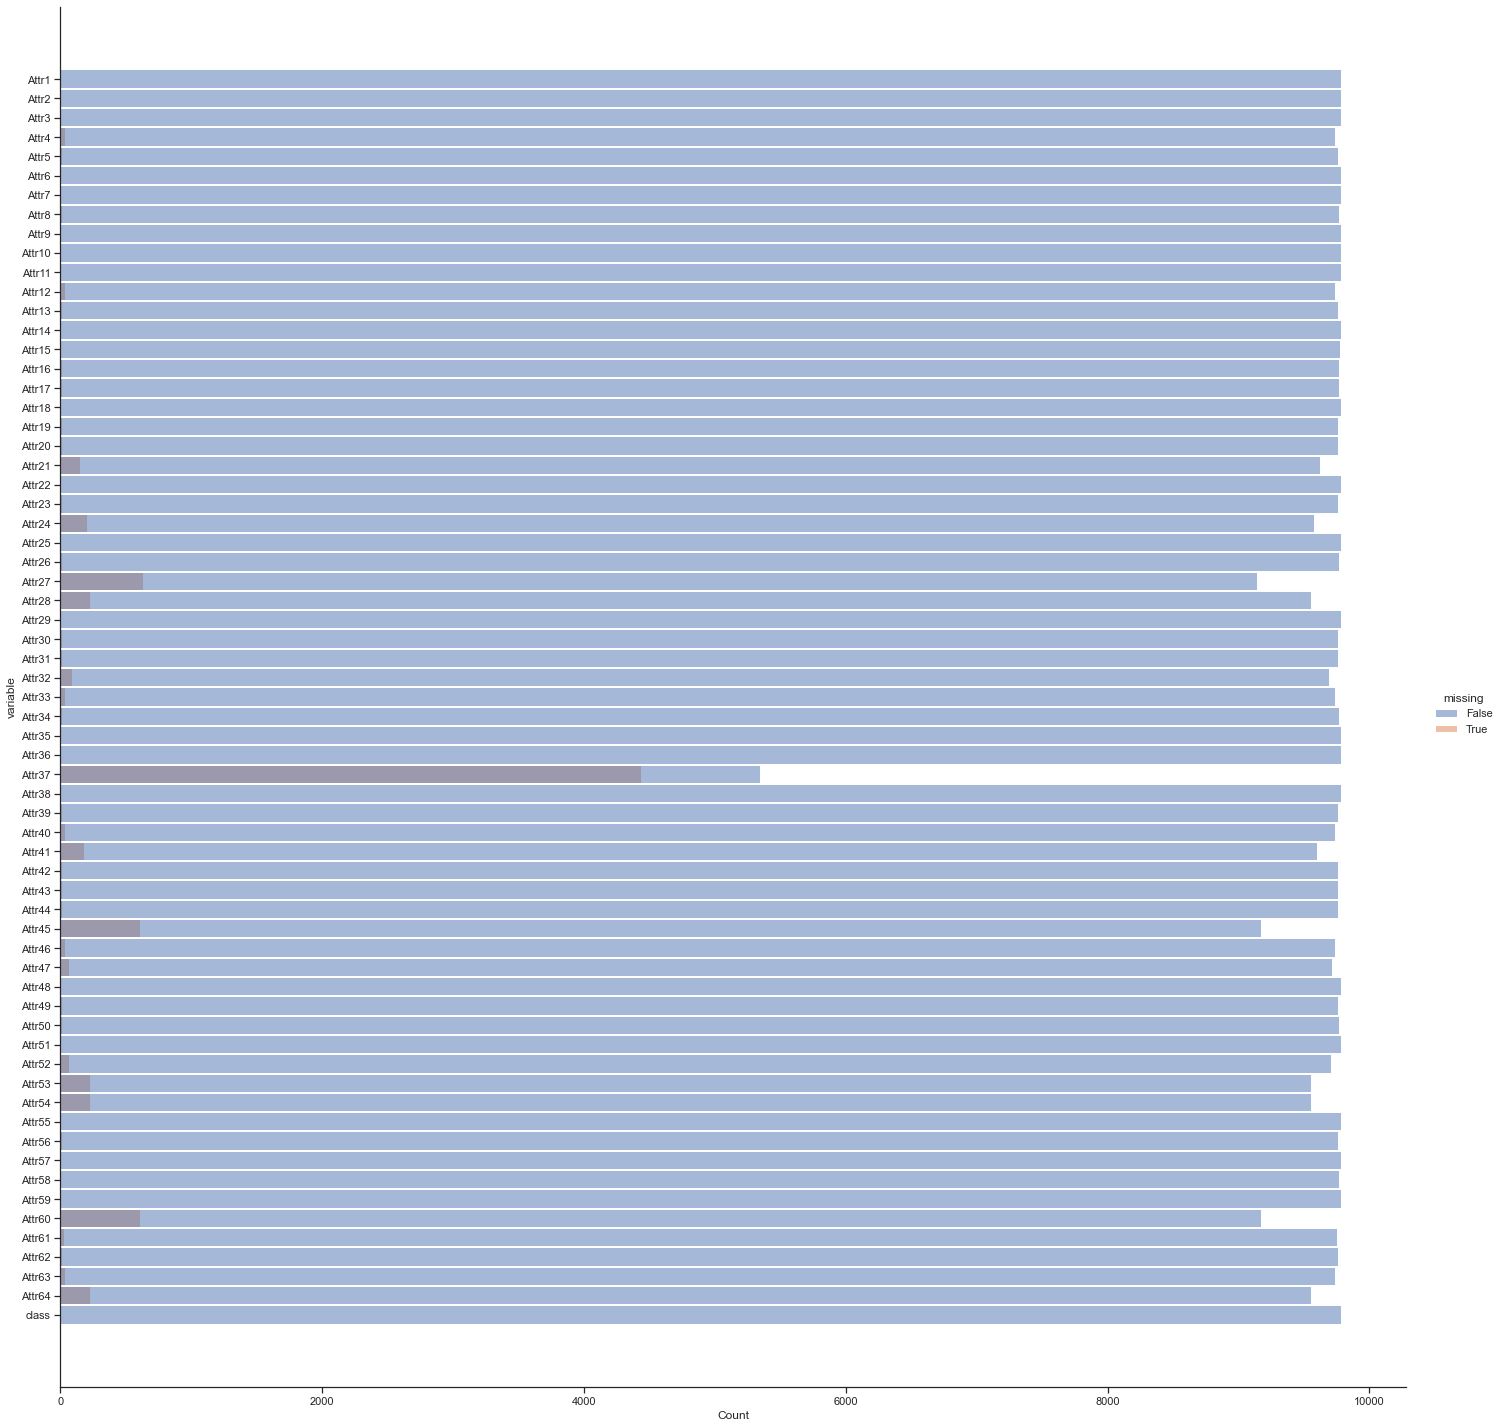

In [14]:
#Plotting the missing values with the displot showing the missing values as true and non missing as false
sns.displot(data=Ts_df.isna().melt(value_name='missing'),y='variable',hue='missing',height=20)

Note: Here two attributes Attr20 and Attr37 have more missing values and mostly the Attr37 which has more missing values than the filled values.

## ii. Data Imputation.

In [15]:
#Iterating through the columns and calculating the mean, then filling the mean in null vales place
for feature in Tr_df.columns:
    m=Tr_df[feature].mean()
    Tr_df[feature].fillna(m,inplace=True)

for feature in Ts_df.columns:
    m=Ts_df[feature].mean()
    Ts_df[feature].fillna(m,inplace=True)

Below, you can see that there are no null values as those values are filled by the mean attribute values of each attribute

In [37]:
#checking if there are any null values
Tr_df.isna().any().sum()

0

In [38]:
#checking if there are any null values
Ts_df.isna().any().sum()

0

<AxesSubplot:xlabel='class', ylabel='count'>

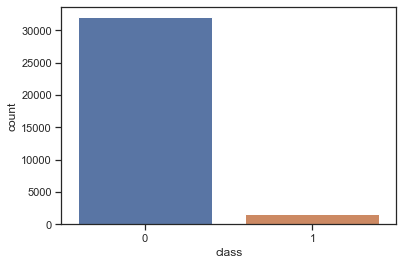

In [18]:
#sns.countplot(Tr_df['class'])

<AxesSubplot:xlabel='class', ylabel='count'>

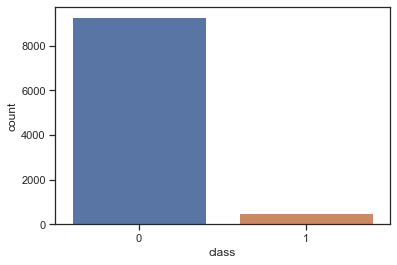

In [19]:
sns.countplot(Ts_df['class'])

The above plots shows taht there is an imbalance in the data and now, we SMOTE for oversampling of the data.

## iii. Dealing of imbalanced data

In [20]:
#installing the imbalanced learn package
!pip3 install imblearn

In [21]:
#importing imblearn package
import imblearn

In [22]:
dir(imblearn)

['FunctionSampler',
 'LazyLoader',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'base',
 'combine',
 'ensemble',
 'exceptions',
 'importlib',
 'keras',
 'metrics',
 'over_sampling',
 'pipeline',
 'show_versions',
 'tensorflow',
 'types',
 'under_sampling',
 'utils']

In [23]:
#importing the SMOTE module from the imbalanced learn package
from imblearn.over_sampling import SMOTE

In [24]:
sm = SMOTE()

In [25]:
#Allocating the target class feature to the variable y and dropping the column class in the X variable for training data
y_train = Tr_df[['class']]
X_train = Tr_df.drop(columns = ['class'])

In [26]:
#Allocating the target class feature to the variable y and dropping the column class in the X variable for training data
y_test = Ts_df[['class']]
X_test = Ts_df.drop(columns = ['class'])

In [27]:
#Oversampling the data
X_train_res, y_train_res = sm.fit_resample(X_train,y_train)

In [28]:
X_train_res.shape

(64074, 64)

In [29]:
y_train_res.shape

(64074, 1)

In [30]:
X_test_res, y_test_res = sm.fit_resample(X_test,y_test)

<AxesSubplot:xlabel='class', ylabel='count'>

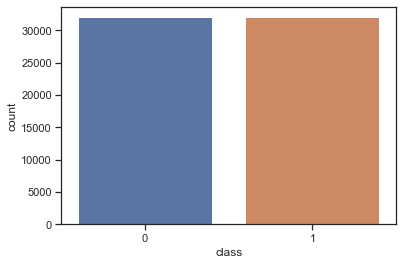

In [31]:
sns.countplot(y_train_res['class'])

<AxesSubplot:xlabel='class', ylabel='count'>

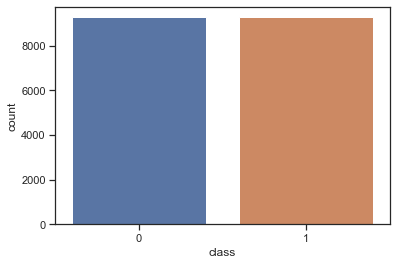

In [32]:
sns.countplot(y_test_res['class'])

From the above it's obvious that the oversampling is done successfully with the help of SMOTE as the there are equal number of true and false in the bankruptcy.

In [33]:
final_train_df = pd.concat([X_train_res,y_train_res],axis=1)

In [34]:
final_test_df = pd.concat([X_test_res,y_test_res],axis=1)

In [35]:
final_train_df.to_csv('Train.csv')

In [36]:
final_test_df.to_csv('Test.csv')